In [1]:
!hostname -I

172.17.0.2 172.18.0.6 


In [2]:
!pip install hdfs

In [1]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from hdfs import InsecureClient

In [2]:
plt.style.use('fivethirtyeight')
d2coding_path = './D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2coding_path)
plt.rcParams["font.family"] = 'D2coding'

matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
client_hdfs = InsecureClient('http://namenode:9870',user='hadoop')
path = "/user/hadoop/cityman.csv"
with client_hdfs.read(path, encoding='euc-kr') as reader:
    data = pd.read_csv(reader)
data.columns = ["year","region","gender","age","value"]
# 데이터프레임 스타일 설정 (가운데 정렬)
styled_data = data.head(10).style.set_table_styles([
{'selector': 'th, td', 'props': [
('text-align', 'center'),
('border', '1px solid #ccc')
]}, # 테이블 헤더 정렬
])
styled_data

,year,region,gender,age,value
0,2014.1/4,서울특별시,남자,20 - 29세,331
1,2014.1/4,서울특별시,남자,30 - 39세,774
2,2014.1/4,서울특별시,남자,40 - 49세,773
3,2014.1/4,서울특별시,남자,50 - 59세,664
4,2014.1/4,서울특별시,남자,60세이상,352
5,2014.1/4,서울특별시,여자,20 - 29세,460
6,2014.1/4,서울특별시,여자,30 - 39세,519
7,2014.1/4,서울특별시,여자,40 - 49세,536
8,2014.1/4,서울특별시,여자,50 - 59세,502
9,2014.1/4,서울특별시,여자,60세이상,221


       year    total
0  2014.1/4  24955.0
1  2014.2/4  25866.0
2  2014.3/4  25969.0
3  2014.4/4  25847.0
4  2015.1/4  25295.0


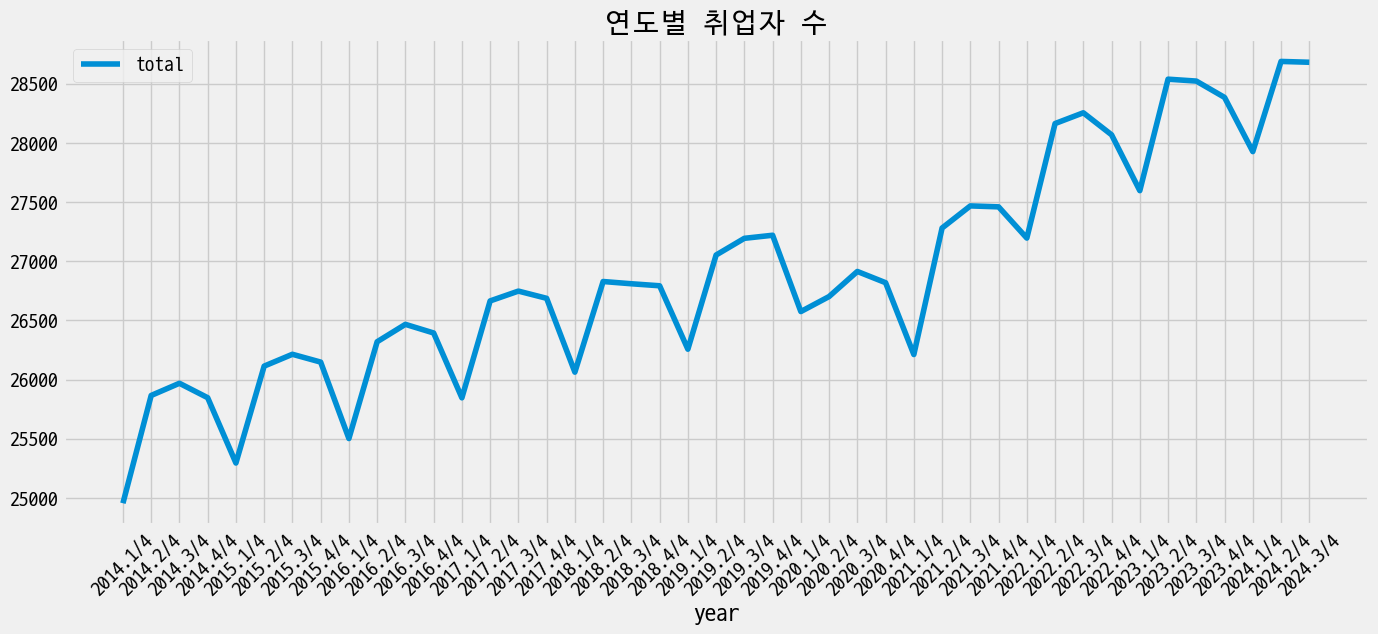

In [4]:
ex_data = data.copy()
ex_data['value'] = pd.to_numeric(ex_data['value'], errors='coerce')
ex1_gdata = ex_data.groupby('year')['value'].sum().reset_index(name='total')
ax = ex1_gdata.plot(x='year',y='total', figsize = (15,6), title="연도별 취업자 수")
print(ex1_gdata.head())

ax.set_xticks(range(len(ex1_gdata)))
ax.set_xticklabels(ex1_gdata['year'],rotation=45)
plt.show()

In [5]:
#gender_data = data.copy()
#gender_data['value'] = pd.to_numeric(gender_data['value'], errors='coerce')
#gen = gender_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')
#male = gen[gen['gender']=='남자']
#female = gen[gen['gender']=='여자']
#ax = gen.plot(x='year', y=[male,female], figsize = (15,6), title="연도별 취업자 수")
#ax.set_xticks(range(len(male)))
#ax.set_xticklabels(ex1_gdata['year'],rotation=45)
#plt.show()

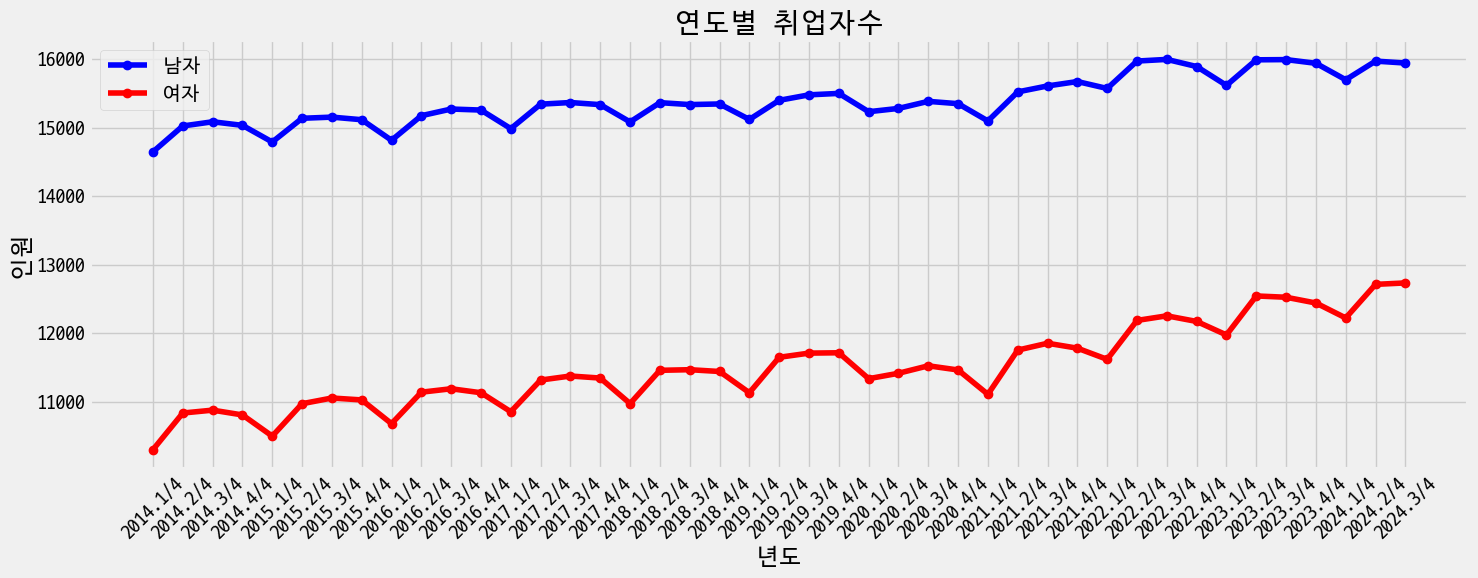

In [6]:
gender_data2 = data.copy()
gender_data2['value']= pd.to_numeric(gender_data2['value'], errors='coerce')
gen = gender_data2.groupby(['year', 'gender'])['value'].sum().reset_index(name='total')

#남자와 여자의 데이터 분리
male = gen[gen['gender']== '남자']
female = gen[gen['gender']== '여자']

#시각화
fig, ax = plt.subplots(figsize=(15, 6))

#남자와 여자의 라인 그래프 그리기
ax.plot(male['year'], male['total'], label='남자', color='blue', linestyle='-', marker='o')
ax.plot(female['year'], female['total'], label='여자', color='red', linestyle='-', marker='o')

#그래프 꾸미기 
ax.set_title("연도별 취업자수")
ax.set_xlabel("년도")
ax.set_ylabel("인원")
ax.set_xticks(male['year']) #x촉 눈금 설정
ax.set_xticklabels(male['year'], rotation=45) #눈금 레이블 설정
ax.legend() #범례 표시 

plt.tight_layout()
plt.show()

In [7]:
#!pip install plotly

01:45:06 - cmdstanpy - INFO - Chain [1] start processing
01:45:06 - cmdstanpy - INFO - Chain [1] done processing


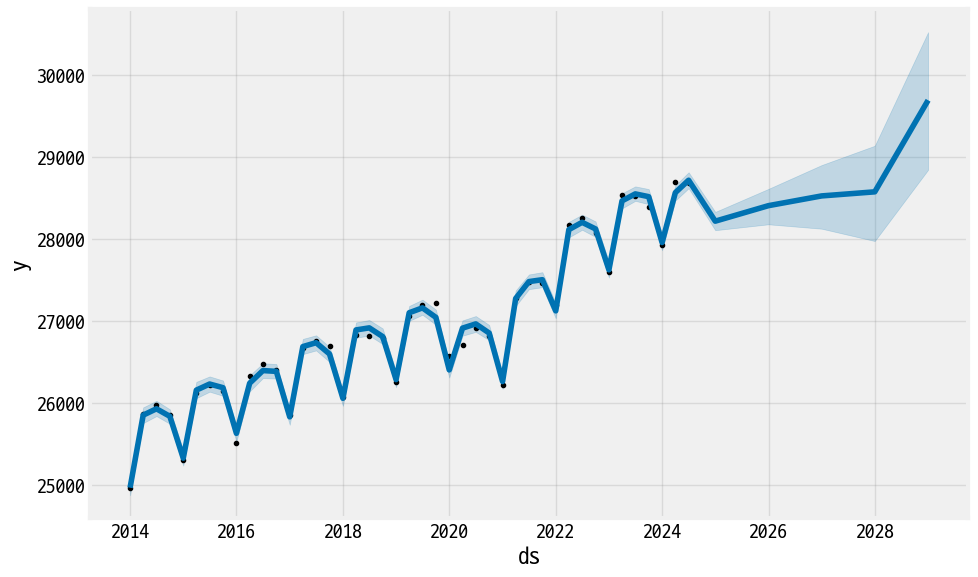

In [16]:
from prophet import Prophet
pdata = ex1_gdata.copy()
# 페이스북에서는 data는 ds, value는 y로 사용해야함. 열이름 수정
pdata = pdata.rename(columns={"year":"ds","total":"y"})
pdata['ds']= pd.to_datetime(pdata['ds']\
    .str.replace('1/4','01.01')\
    .str.replace('2/4','04.01')\
    .str.replace('3/4','07.01')\
    .str.replace('4/4','10.01'))
#print(pdata[pdata['ds'] > '2018-01-01')기간정하기

m = Prophet() #페이스북 예측 모듈
m.fit(pdata)

future = m.make_future_dataframe(periods=5, freq='Y')
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.show()

In [8]:
# 청년 (20대) 취업자 수 vs 60세 이상 취업자 수
import numpy as np
ex2_data = data.copy()
ex3_data = data.copy()

#2018년도 
filter1 = (ex2_data['year'] >= '2018.1/4') & (ex2_data['year'] < '2019.1/4')
filter2 = (ex3_data['year'] >= '2024.1/4') & (ex3_data['year'] < '2024.1/4')
ex2_data=ex2_data[filter1]
ex3_data=ex3_data[filter2]

ex2_data['value'] = pd.to_numeric(ex2_data['value']) # errors='coeprce'
ex3_data['value'] = pd.to_numeric(ex3_data['value']) # errors='coeprce'

filter20_1 = ex2_data['age'] == '20 - 29세'
filter60_1 = ex2_data['age'] == '60세 이상'
x_data = ex2_data[filter20_1]
y_data = ex2_data[filter60_1]

filter20_2 = ex3_data['age'] == '20 - 29세'
filter60_2 = ex3_data['age'] == '60세 이상'
xx_data = ex3_data[filter20_2]
yy_data = ex3_data[filter60_2]

x = x_data.groupby('region')['value'].sum()
y = x_data.groupby('region')['value'].sum()
z = x_data.groupby('region')['value'].sum()

xx = x_data.groupby('region')['value'].sum()
yy = x_data.groupby('region')['value'].sum()
zz = x_data.groupby('region')['value'].sum()

#지역 이름 리스트
regions = list(x.index)
# color = []
# 버블색상
color = [np.random.rand(3,) for _ in range(len(x.index))]


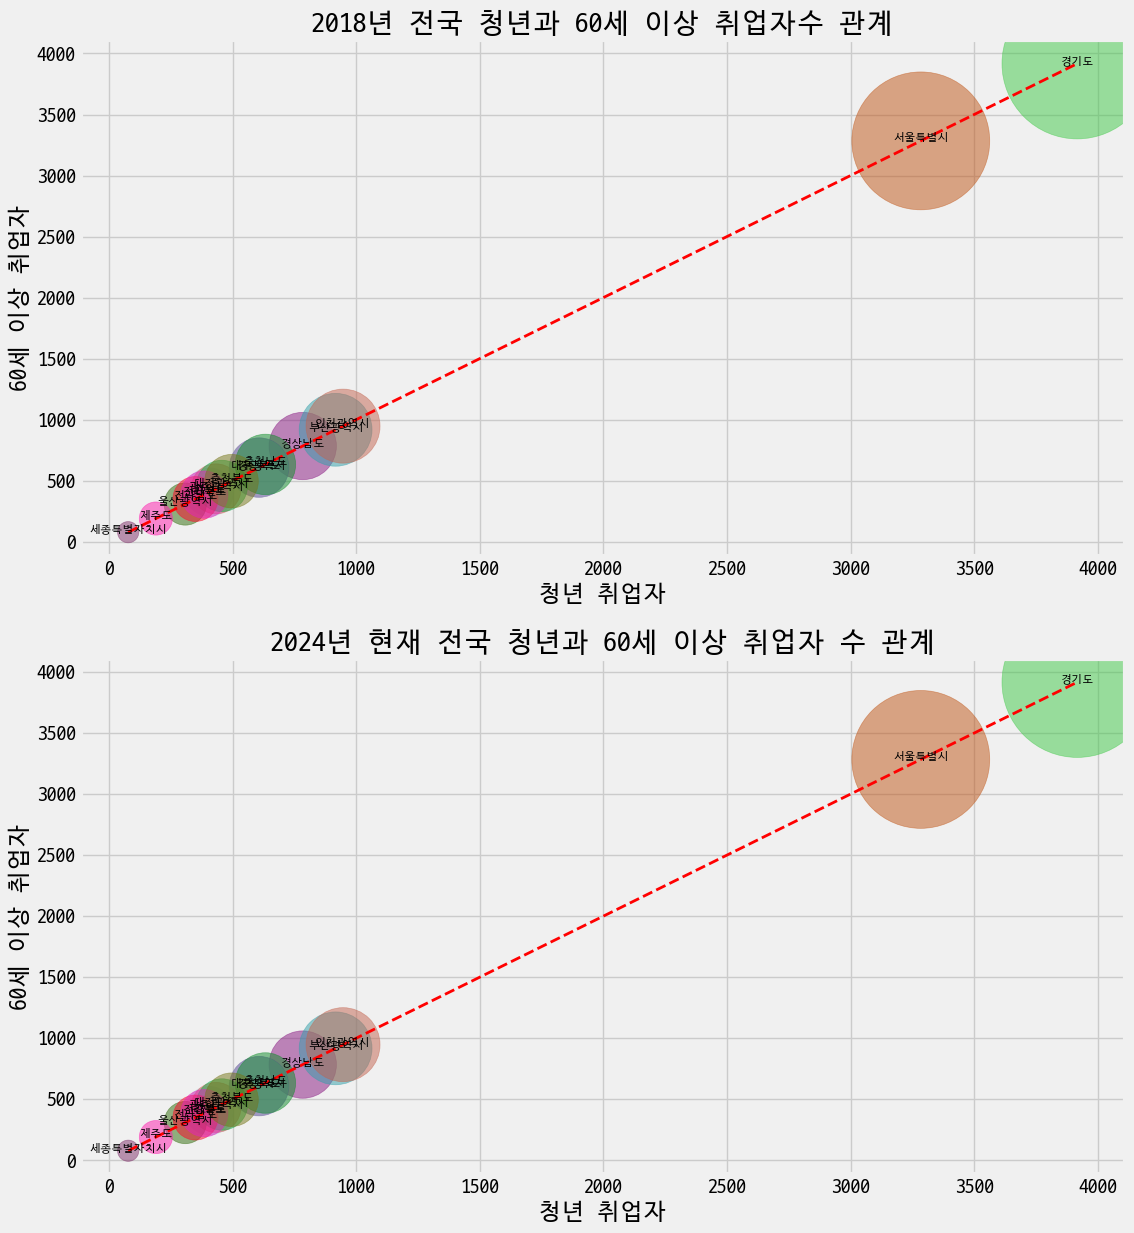

In [11]:
fig, ax = plt.subplots(2,1,figsize=(12,14))
scatter = ax[0].scatter(x,y, s=z*3, c=color, alpha=0.5)
scatter = ax[1].scatter(xx,yy, s=z*3, c=color, alpha=0.5)
#대각선 기준선 추가
min_val = min(min(x),min(y))
max_val =max(max(x),max(y))
ax[0].plot([min_val,max_val],[min_val,max_val], color='red', linestyle='--', linewidth=2)
ax[1].plot([min_val,max_val],[min_val,max_val], color='red', linestyle='--', linewidth=2)

for i in range(len(x)):
    ax[0].annotate(regions[i], xy=(x.iloc[i],y.iloc[i]), ha='center',fontsize=8)
    ax[1].annotate(regions[i], xy=(xx.iloc[i],yy.iloc[i]), ha='center', fontsize=8)

ax[0].set_title("2018년 전국 청년과 60세 이상 취업자수 관계", size=20)
ax[0].set_xlabel("청년 취업자")
ax[0].set_ylabel("60세 이상 취업자")
ax[1].set_title("2024년 현재 전국 청년과 60세 이상 취업자 수 관계", size=20)
ax[1].set_xlabel("청년 취업자")
ax[1].set_ylabel("60세 이상 취업자")

plt.savefig('청년 60년 취업자수 관계.png')
plt.show()